### Data Visualization Notebook
This notebook contains the code of the Univariate and Bivariate Analysis of the Reddit dataset as to see how differnt features are dependent on each other and can help to analyse while building the mdoel.


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('reddit_data.csv')

Since the timestamp of the data scrapped is in different format. So the get_data function converts each date into YY/MM/DD time format.

In [3]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)

In [4]:
_timestamp = data["created"].apply(get_date)

In [5]:
data = data.assign(timestamp = _timestamp)

In [6]:
data = data.drop(['created'], axis=1)
data.head()

,title,score,id,url,comms_num,body,author,flair,comment,authors,feature_combine,timestamp
0,men 30+ decided get married plan old age,257,fvy95j,https://www.reddit.com/r/india/comments/fvy95j...,206,corona virus given time think life choices bit...,indianoogler,AskIndia,plan finances work enjoy ways healthy go see w...,RedDevil-84 congratsindia khushraho kingof-po...,men 30+ decided get married plan old ageplan f...,2020-04-07 02:26:25
1,plan 5th april 9pm switch lights play bella ci...,125,fv8lt3,https://www.reddit.com/r/india/comments/fv8lt3...,82,dont like worship leaders without logic sympat...,ioup568,AskIndia,made whatsapp forward post anyone interestedpl...,AnonymousSeeker5 TablePrime69 faceofnobody no...,plan 5th april 9pm switch lights play bella ci...,2020-04-05 18:57:53
2,got scammed today foolishness give advice im r...,217,ftjihj,https://www.reddit.com/r/india/comments/ftjihj...,75,info meim 12th class recently registered googl...,Momos-,AskIndia,literally every message every bank says share ...,saadakhtar SerpantSociety BombayCynic iphone4...,got scammed today foolishness give advice im r...,2020-04-02 23:13:32
3,serious friends doctor husband become paranoid...,149,fu3f8b,https://www.reddit.com/r/india/comments/fu3f8b...,76,doctor says 100 sure virus spreading via veget...,wordswithmagic,AskIndia,1 research study 2013 https linkspringercom ar...,Neglectedsince1994 captainobvioushuman adga49...,serious friends doctor husband become paranoid...,2020-04-03 20:13:25
4,employer making come office even subtle pressu...,308,fjx0dq,https://www.reddit.com/r/india/comments/fjx0dq...,113,fill form 100 anonymous take less minute https...,pensker,AskIndia,good luck employer act one two people die lol ...,ekkanpuriya Death_Pig nuvo_reddit goldyprag s...,employer making come office even subtle pressu...,2020-03-17 15:28:23


The data contains in total of 2528 rows and 12 columns. 

In [7]:
data.shape

(2528, 12)

In [8]:
data.dtypes

title                      object
score                       int64
id                         object
url                        object
comms_num                   int64
body                       object
author                     object
flair                      object
comment                    object
authors                    object
feature_combine            object
timestamp          datetime64[ns]
dtype: object

### Univariate Analysis of Data
In univariate analysis of data we only consider the single feature of data for visualization.

### Bar plot of Flairs
The bar plot of flairs give us a sense of distribution of different flairs. By having a look at the bar plot it seems that the dataset is mostly balanced. Except the AskIndia flair each of the flairs have the distribution around 200-250. This is a good way to get the sense of the dataset whether it is balanced or unbalanced.

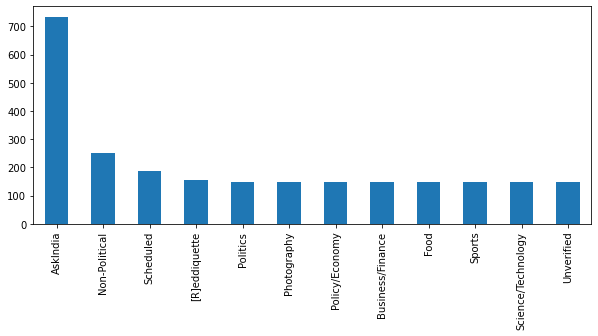

In [9]:
flair_tags = ["AskIndia", "Unverified", "Non-Political", 
          "Scheduled", "Photography", "Science/Technology",
          "Politics", "Business/Finance", "Policy/Economy",
          "Sports", "Food", "[R]eddiquette"]
plt.figure(figsize=(10,4))
data.flair.value_counts().plot(kind='bar')

In [10]:
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (123, 12)


In [11]:
data.count()

title              2528
score              2528
id                 2528
url                2528
comms_num          2528
body               1379
author             2528
flair              2528
comment            2429
authors            2430
feature_combine    2528
timestamp          2528
dtype: int64

In [12]:
print(data.isnull().sum())

title                 0
score                 0
id                    0
url                   0
comms_num             0
body               1149
author                0
flair                 0
comment              99
authors              98
feature_combine       0
timestamp             0
dtype: int64


### Score Distribution Histogram Plot
The histogram of score distribution shows that the maximum frequency of the score falls in range 0-50. The distribution is assymetrical and skewed.

Text(0.5, 1.0, 'Score Distribution')

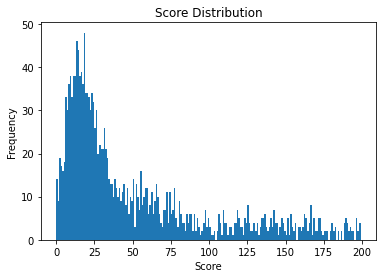

In [36]:
temp = data['score']
plt.hist(x=temp, bins = np.arange(0,200,1))
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Score Distribution')

In [37]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText
data['title'] = preprocess(data['title'])

data['title_len'] = data['title'].astype(str).apply(len)
data['title_word_count'] = data['title'].apply(lambda x: len(str(x).split()))

In [38]:
data.head()

,title,score,id,url,comms_num,body,author,flair,comment,authors,feature_combine,timestamp,title_len,title_word_count
0,men 30+ decided get married plan old age,257,fvy95j,https://www.reddit.com/r/india/comments/fvy95j...,206,corona virus given time think life choices bit...,indianoogler,AskIndia,plan finances work enjoy ways healthy go see w...,RedDevil-84 congratsindia khushraho kingof-po...,men 30+ decided get married plan old ageplan f...,2020-04-07 02:26:25,40,8
1,plan 5th april 9pm switch lights play bella ci...,125,fv8lt3,https://www.reddit.com/r/india/comments/fv8lt3...,82,dont like worship leaders without logic sympat...,ioup568,AskIndia,made whatsapp forward post anyone interestedpl...,AnonymousSeeker5 TablePrime69 faceofnobody no...,plan 5th april 9pm switch lights play bella ci...,2020-04-05 18:57:53,64,12
2,got scammed today foolishness give advice im r...,217,ftjihj,https://www.reddit.com/r/india/comments/ftjihj...,75,info meim 12th class recently registered googl...,Momos-,AskIndia,literally every message every bank says share ...,saadakhtar SerpantSociety BombayCynic iphone4...,got scammed today foolishness give advice im r...,2020-04-02 23:13:32,70,10
3,serious friends doctor husband become paranoid...,149,fu3f8b,https://www.reddit.com/r/india/comments/fu3f8b...,76,doctor says 100 sure virus spreading via veget...,wordswithmagic,AskIndia,1 research study 2013 https linkspringercom ar...,Neglectedsince1994 captainobvioushuman adga49...,serious friends doctor husband become paranoid...,2020-04-03 20:13:25,90,12
4,employer making come office even subtle pressu...,308,fjx0dq,https://www.reddit.com/r/india/comments/fjx0dq...,113,fill form 100 anonymous take less minute https...,pensker,AskIndia,good luck employer act one two people die lol ...,ekkanpuriya Death_Pig nuvo_reddit goldyprag s...,employer making come office even subtle pressu...,2020-03-17 15:28:23,102,16


### Title Word Count Histogram Plot
The title of each posts is preprocess as to clean the text further and after that a new column is added in the dataset which represents the total word count of each title. I have done this visualization to see as what's the average word count of each posts title.

Text(0.5, 1.0, 'Title Word Count distribution of each posts')

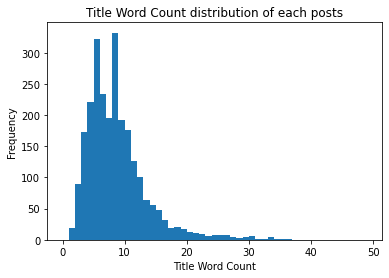

In [39]:
temp = data['title_word_count']
plt.hist(temp, bins = np.arange(0, 50, 1))
plt.xlabel('Title Word Count')
plt.ylabel('Frequency')
plt.title('Title Word Count distribution of each posts')

### Title Length Histogram Plot
The title of each posts is preprocess as to clean the text further and after that a new column is added in the dataset which represents the length of each title. I have done this visualization to see as what's the average length each posts title. The plot seems kind of bi-modal distribution.


Text(0.5, 1.0, 'Title Length  distribution of each posts')

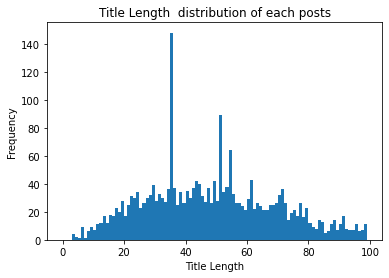

In [42]:
temp = data['title_len']
plt.hist(temp, bins = np.arange(0, 100, 1))
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.title('Title Length  distribution of each posts')

In [43]:
data['comment'] = preprocess(data["comment"])
data['comment_len'] = data['comment'].astype(str).apply(len)
data['comment_word_count'] = data['comment'].apply(lambda x: len(str(x).split()))

In [44]:
data.head()

,title,score,id,url,comms_num,body,author,flair,comment,authors,feature_combine,timestamp,title_len,title_word_count,comment_len,comment_word_count
0,men 30+ decided get married plan old age,257,fvy95j,https://www.reddit.com/r/india/comments/fvy95j...,206,corona virus given time think life choices bit...,indianoogler,AskIndia,plan finances work enjoy ways healthy go see w...,RedDevil-84 congratsindia khushraho kingof-po...,men 30+ decided get married plan old ageplan f...,2020-04-07 02:26:25,40,8,3501,524
1,plan 5th april 9pm switch lights play bella ci...,125,fv8lt3,https://www.reddit.com/r/india/comments/fv8lt3...,82,dont like worship leaders without logic sympat...,ioup568,AskIndia,made whatsapp forward post anyone interestedpl...,AnonymousSeeker5 TablePrime69 faceofnobody no...,plan 5th april 9pm switch lights play bella ci...,2020-04-05 18:57:53,64,12,1454,213
2,got scammed today foolishness give advice im r...,217,ftjihj,https://www.reddit.com/r/india/comments/ftjihj...,75,info meim 12th class recently registered googl...,Momos-,AskIndia,literally every message every bank says share ...,saadakhtar SerpantSociety BombayCynic iphone4...,got scammed today foolishness give advice im r...,2020-04-02 23:13:32,70,10,2055,338
3,serious friends doctor husband become paranoid...,149,fu3f8b,https://www.reddit.com/r/india/comments/fu3f8b...,76,doctor says 100 sure virus spreading via veget...,wordswithmagic,AskIndia,1 research study 2013 https linkspringercom ar...,Neglectedsince1994 captainobvioushuman adga49...,serious friends doctor husband become paranoid...,2020-04-03 20:13:25,90,12,2275,293
4,employer making come office even subtle pressu...,308,fjx0dq,https://www.reddit.com/r/india/comments/fjx0dq...,113,fill form 100 anonymous take less minute https...,pensker,AskIndia,good luck employer act one two people die lol ...,ekkanpuriya Death_Pig nuvo_reddit goldyprag s...,employer making come office even subtle pressu...,2020-03-17 15:28:23,102,16,2147,320


Text(0.5, 1.0, 'Comment Length  distribution of each posts')

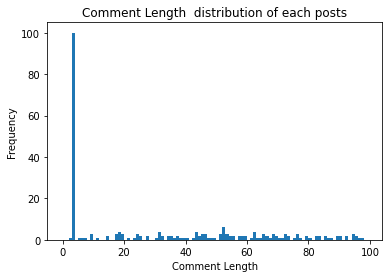

In [50]:
temp = data['comment_len']
plt.hist(temp, bins = np.arange(0, 100, 1))
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.title('Comment Length  distribution of each posts')

Text(0.5, 1.0, 'Comment Word Count distribution of each posts')

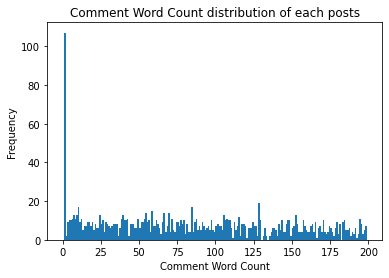

In [52]:
temp = data['comment_word_count']
plt.hist(temp, bins = np.arange(0, 200, 1))
plt.xlabel('Comment Word Count')
plt.ylabel('Frequency')
plt.title('Comment Word Count distribution of each posts')

### Bivariate Analysis
Bivariate Analysis is the simulataneous analysis of two variables. It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.

### Bar Plot of Average Number of Comments per post
This plot  is between two features the flairs and the number of comments per posts. This plot was drawn to get a sense of how strongly the number of comments per post is associated with the flair. On having a look at the plot it seems that there is not a strong relationship between the two variables.


Text(0, 0.5, 'Number of comments')

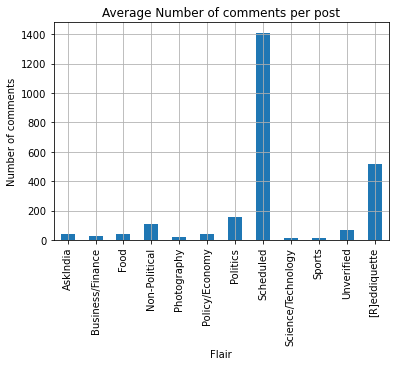

In [54]:
data2 = data.groupby("flair").mean()[['comms_num']]

data2.plot(kind='bar', legend=False, grid=True)
plt.title("Average Number of comments per post")

plt.xlabel("Flair")
plt.ylabel("Number of comments")

### Bar plot of average comments word count for each posts
This plot  is between two features the flairs and the number of comments word count for each posts. On having a look at the plot it seems that there is a strong relationship between the two variables. Average number of words can act as a good features for us during building the Machine Learning Model.


Text(0, 0.5, 'Word count of Comments')

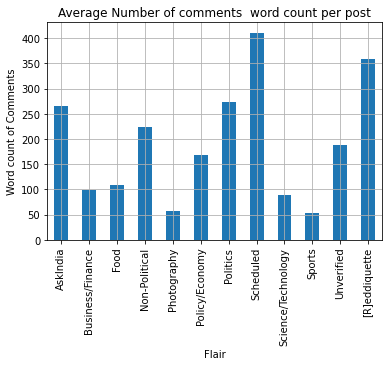

In [62]:
data2 = data.groupby("flair").mean()[['comment_word_count']]

data2.plot(kind='bar', legend=False, grid=True)
plt.title("Average Number of comments  word count per post")

plt.xlabel("Flair")
plt.ylabel("Word count of Comments")

### Bar plot of average number of word count of title per post
The bar plot shows that there is strong association between two variable the one the flair tags and the other the word count of title.

Text(0, 0.5, 'Word count of Title')

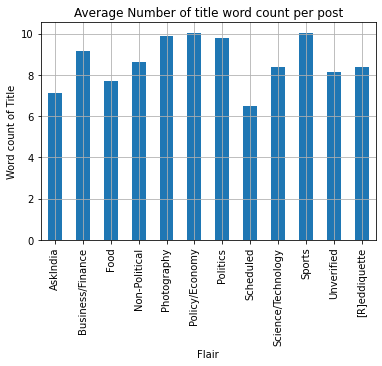

In [57]:
data2 = data.groupby("flair").mean()[['title_word_count']]

data2.plot(kind='bar', legend=False, grid=True)
plt.title("Average Number of title word count per post")

plt.xlabel("Flair")
plt.ylabel("Word count of Title")

In [58]:
data['body'] = preprocess(data["body"])
data['body_len'] = data['body'].astype(str).apply(len)
data['body_word_count'] = data['body'].apply(lambda x: len(str(x).split()))

In [59]:
data.head()

,title,score,id,url,comms_num,body,author,flair,comment,authors,feature_combine,timestamp,title_len,title_word_count,comment_len,comment_word_count,body_len,body_word_count
0,men 30+ decided get married plan old age,257,fvy95j,https://www.reddit.com/r/india/comments/fvy95j...,206,corona virus given time think life choices bit...,indianoogler,AskIndia,plan finances work enjoy ways healthy go see w...,RedDevil-84 congratsindia khushraho kingof-po...,men 30+ decided get married plan old ageplan f...,2020-04-07 02:26:25,40,8,3501,524,346,55
1,plan 5th april 9pm switch lights play bella ci...,125,fv8lt3,https://www.reddit.com/r/india/comments/fv8lt3...,82,dont like worship leaders without logic sympat...,ioup568,AskIndia,made whatsapp forward post anyone interestedpl...,AnonymousSeeker5 TablePrime69 faceofnobody no...,plan 5th april 9pm switch lights play bella ci...,2020-04-05 18:57:53,64,12,1454,213,1121,163
2,got scammed today foolishness give advice im r...,217,ftjihj,https://www.reddit.com/r/india/comments/ftjihj...,75,info meim 12th class recently registered googl...,Momos-,AskIndia,literally every message every bank says share ...,saadakhtar SerpantSociety BombayCynic iphone4...,got scammed today foolishness give advice im r...,2020-04-02 23:13:32,70,10,2055,338,1669,267
3,serious friends doctor husband become paranoid...,149,fu3f8b,https://www.reddit.com/r/india/comments/fu3f8b...,76,doctor says 100 sure virus spreading via veget...,wordswithmagic,AskIndia,1 research study 2013 https linkspringercom ar...,Neglectedsince1994 captainobvioushuman adga49...,serious friends doctor husband become paranoid...,2020-04-03 20:13:25,90,12,2275,293,463,68
4,employer making come office even subtle pressu...,308,fjx0dq,https://www.reddit.com/r/india/comments/fjx0dq...,113,fill form 100 anonymous take less minute https...,pensker,AskIndia,good luck employer act one two people die lol ...,ekkanpuriya Death_Pig nuvo_reddit goldyprag s...,employer making come office even subtle pressu...,2020-03-17 15:28:23,102,16,2147,320,885,118


### Bar plot of body length of each posts per flair category
The body of each posts flair is further preprocessed to clean the text and calculate the length of the body text. The bar plot shows that there may exist a strong relationship between both the variables the one flair and the other the body text length.

Text(0, 0.5, 'Body length')

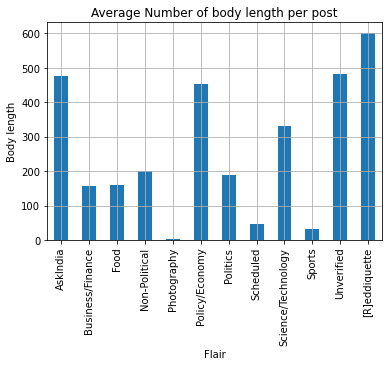

In [60]:
data2 = data.groupby("flair").mean()[['body_len']]

data2.plot(kind='bar', legend=False, grid=True)
plt.title("Average Number of body length per post")

plt.xlabel("Flair")
plt.ylabel("Body length")

### Bar plot of body word count for each of the posts


Text(0, 0.5, 'Body Word Count')

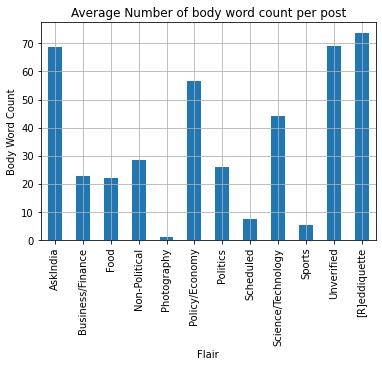

In [61]:
data2 = data.groupby("flair").mean()[['body_word_count']]

data2.plot(kind='bar', legend=False, grid=True)
plt.title("Average Number of body word count per post")

plt.xlabel("Flair")
plt.ylabel("Body Word Count")